In [47]:
# za null vrijednosti unjeti medijan

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("/content/sample_data/Tim_02_credit_data.csv")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [51]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [52]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [54]:
df = df.drop(df.columns[0], axis=1)

In [55]:
print("\nNedostajuće vrijednosti po stupcima:")
print(df.isnull().sum())


Nedostajuće vrijednosti po stupcima:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [56]:
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode()[0])


print(df)

     Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own          little           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little           little           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little           little           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little           little            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576   

     Duration              

In [57]:
print("\nNedostajuće vrijednosti po stupcima:")
print(df.isnull().sum())


Nedostajuće vrijednosti po stupcima:
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [59]:
df["Sex"] = df["Sex"].map({"female": 0, "male": 1})

In [60]:
numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration', 'Sex']
categorical_cols = ['Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

df_numerical = df[numerical_cols]
df_categorical = df[categorical_cols]

print("Numerical Data:\n", df_numerical)
print("Categorical Data:\n", df_categorical)

Numerical Data:
      Age  Job  Credit amount  Duration  Sex
0     67    2           1169         6    1
1     22    2           5951        48    0
2     49    1           2096        12    1
3     45    2           7882        42    1
4     53    2           4870        24    1
..   ...  ...            ...       ...  ...
995   31    1           1736        12    0
996   40    3           3857        30    1
997   38    2            804        12    1
998   23    2           1845        45    1
999   27    2           4576        45    1

[1000 rows x 5 columns]
Categorical Data:
     Housing Saving accounts Checking account              Purpose  Risk
0       own          little           little             radio/TV  good
1       own          little         moderate             radio/TV   bad
2       own          little           little            education  good
3      free          little           little  furniture/equipment  good
4      free          little           little       

In [61]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

df_categorical_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), columns=categorical_cols)

category_mappings = {}
for col, categories in zip(categorical_cols, encoder.categories_):
    category_mappings[col] = {i: category for i, category in enumerate(categories)}

print("Encoded Categorical Data:\n", df_categorical_encoded)
print("\nCategory Mappings:\n", category_mappings)


Encoded Categorical Data:
      Housing  Saving accounts  Checking account  Purpose  Risk
0        1.0              0.0               0.0      5.0   1.0
1        1.0              0.0               1.0      5.0   0.0
2        1.0              0.0               0.0      3.0   1.0
3        0.0              0.0               0.0      4.0   1.0
4        0.0              0.0               0.0      1.0   0.0
..       ...              ...               ...      ...   ...
995      1.0              0.0               0.0      4.0   1.0
996      1.0              0.0               0.0      1.0   1.0
997      1.0              0.0               0.0      5.0   1.0
998      0.0              0.0               0.0      5.0   0.0
999      1.0              1.0               1.0      1.0   1.0

[1000 rows x 5 columns]

Category Mappings:
 {'Housing': {0: 'free', 1: 'own', 2: 'rent'}, 'Saving accounts': {0: 'little', 1: 'moderate', 2: 'quite rich', 3: 'rich'}, 'Checking account': {0: 'little', 1: 'moderate',

In [62]:
df_final = pd.concat([df_numerical, df_categorical_encoded], axis=1)
print(df_final)


     Age  Job  Credit amount  Duration  Sex  Housing  Saving accounts  \
0     67    2           1169         6    1      1.0              0.0   
1     22    2           5951        48    0      1.0              0.0   
2     49    1           2096        12    1      1.0              0.0   
3     45    2           7882        42    1      0.0              0.0   
4     53    2           4870        24    1      0.0              0.0   
..   ...  ...            ...       ...  ...      ...              ...   
995   31    1           1736        12    0      1.0              0.0   
996   40    3           3857        30    1      1.0              0.0   
997   38    2            804        12    1      1.0              0.0   
998   23    2           1845        45    1      0.0              0.0   
999   27    2           4576        45    1      1.0              1.0   

     Checking account  Purpose  Risk  
0                 0.0      5.0   1.0  
1                 1.0      5.0   0.0  
2     

In [63]:
# 2 histograma za jednu znacajku, 1 histogram za znacajke sa risk value 0 a drugi za risk value 1

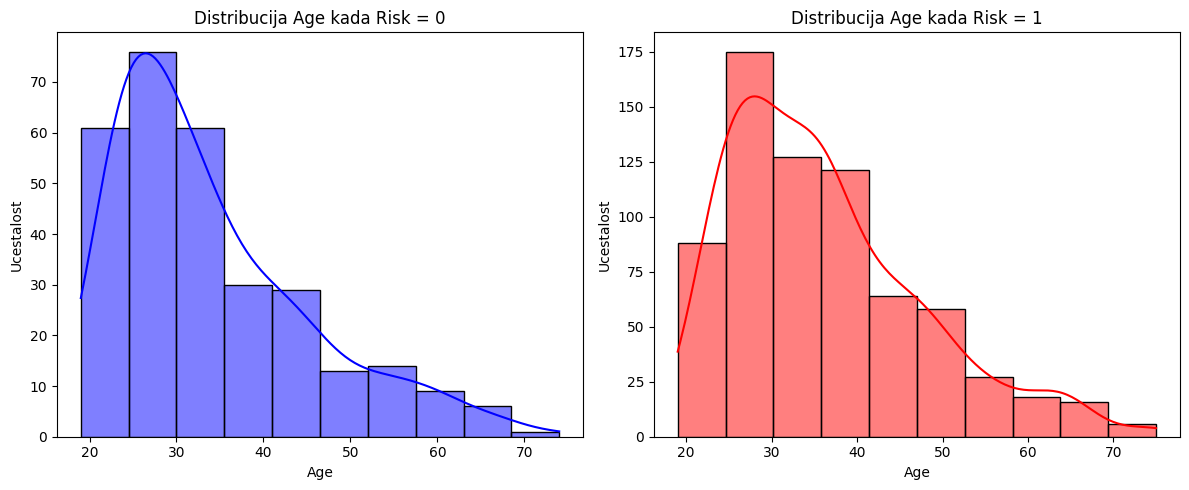

In [64]:

x_variable = 'Age'

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_final[df_final['Risk'] == 0][x_variable], bins=10, kde=True, color='blue')
plt.title(f'Distribucija {x_variable} kada Risk = 0')
plt.xlabel(x_variable)
plt.ylabel('Ucestalost')

plt.subplot(1, 2, 2)
sns.histplot(df_final[df_final['Risk'] == 1][x_variable], bins=10, kde=True, color='red')
plt.title(f'Distribucija {x_variable} kada Risk = 1')
plt.xlabel(x_variable)
plt.ylabel('Ucestalost')

plt.tight_layout()
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler
X = df_final.drop(columns=["Risk"])
y = df_final["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
# staviti podatke u tenzore
# print(X_train)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Job               1000 non-null   int64  
 2   Credit amount     1000 non-null   int64  
 3   Duration          1000 non-null   int64  
 4   Sex               1000 non-null   int64  
 5   Housing           1000 non-null   float64
 6   Saving accounts   1000 non-null   float64
 7   Checking account  1000 non-null   float64
 8   Purpose           1000 non-null   float64
 9   Risk              1000 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 78.3 KB


In [89]:
# Arhitektura modela - pytorch - razred NeuralNet
class NNClassifier(nn.Module):
    def __init__(self, input_dim, hidden_layers, output_dim, dropout=0.1, activation=nn.Sigmoid()):
        super(NNClassifier, self).__init__()
        layers = []
        prev_dim = input_dim
        activation_fn = activation
        # Hidden layers
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))  # Batch Normalization for stability
            layers.append(activation_fn)
            if dropout > 0.0:
                layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim
        layers.append(nn.Linear(prev_dim, output_dim))
        if(output_dim==1):
          layers.append(nn.Sigmoid())
        self.model = nn.Sequential(*layers)
        self._initialize_weights()
    def forward(self, x):
        return self.model(x)
    def _initialize_weights(self):
        for layer in self.model:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
    def train_nn(self, dataloader, num_epochs, optimizer, criterion, device):
        self.to(device)
        self.train()
        history=[]
        for epoch in range(num_epochs):
            running_loss = 0.0
            for batch_X, batch_y in dataloader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                optimizer.zero_grad()
                outputs = None
                if(output_dim==1):
                  outputs = self(batch_X).squeeze()
                else:
                  outputs = self(batch_X)
                outputs = self(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * batch_X.size(0)
            epoch_loss = running_loss / len(dataloader.dataset)
            history.append(epoch_loss)
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.9f}")
        print("Training complete.")
        return history
input_dim = X_train.shape[1]
hidden_layers = [64, 128]
output_dim = 2
dropout = 0.2

X_train_np = X_train.astype(np.float32)
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
y_train_np = y_train.values.astype(np.long) #for crossentropyloss
# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.from_numpy(X_train_np).to(device)
y_train_tensor = torch.from_numpy(y_train_np).to(device)
# Create DataLoader
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

#criterion= nn.BCELoss()
criterion= nn.CrossEntropyLoss(weight=torch.tensor([0.7,0.3]))

# Train the model
model = NNClassifier(input_dim, hidden_layers, output_dim, dropout,activation=nn.Sigmoid()).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)

history = model.train_nn(num_epochs=128, optimizer=optimizer, criterion=criterion, dataloader=dataloader, device=device)


Epoch 1/128, Loss: 0.753351780
Epoch 2/128, Loss: 0.739902747
Epoch 3/128, Loss: 0.734777066
Epoch 4/128, Loss: 0.685460116
Epoch 5/128, Loss: 0.691196377
Epoch 6/128, Loss: 0.685492102
Epoch 7/128, Loss: 0.705390339
Epoch 8/128, Loss: 0.689222576
Epoch 9/128, Loss: 0.673365396
Epoch 10/128, Loss: 0.674319608
Epoch 11/128, Loss: 0.720696894
Epoch 12/128, Loss: 0.683753519
Epoch 13/128, Loss: 0.692210306
Epoch 14/128, Loss: 0.687912234
Epoch 15/128, Loss: 0.662161397
Epoch 16/128, Loss: 0.689164843
Epoch 17/128, Loss: 0.691462919
Epoch 18/128, Loss: 0.664427958
Epoch 19/128, Loss: 0.669728445
Epoch 20/128, Loss: 0.653946987
Epoch 21/128, Loss: 0.652473704
Epoch 22/128, Loss: 0.667413366
Epoch 23/128, Loss: 0.671810997
Epoch 24/128, Loss: 0.700209773
Epoch 25/128, Loss: 0.681336139
Epoch 26/128, Loss: 0.677902400
Epoch 27/128, Loss: 0.652843065
Epoch 28/128, Loss: 0.648915592
Epoch 29/128, Loss: 0.643690979
Epoch 30/128, Loss: 0.634461477
Epoch 31/128, Loss: 0.633177553
Epoch 32/128, Los

In [90]:
# rezultati za test
# 3 razl modela
# confusion matrix

# 1
model1 = NNClassifier(input_dim=X_train.shape[1], hidden_layers=[32], output_dim=2, dropout=0.2).to(device)
optimizer1 = optim.Adam(model1.parameters(), lr=0.01)
print("\n🔹 Training Model 1 (Plitki)...")
history1 = model1.train_nn(dataloader, num_epochs=128, optimizer=optimizer1, criterion=criterion, device=device)

# 2
model2 = NNClassifier(input_dim=X_train.shape[1], hidden_layers=[64, 128, 64], output_dim=2, dropout=0.2).to(device)
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)
print("\n🔹 Training Model 2 (Srednji)...")
history2 = model2.train_nn(dataloader, num_epochs=128, optimizer=optimizer2, criterion=criterion, device=device)

# 3
model3 = NNClassifier(input_dim=X_train.shape[1], hidden_layers=[64, 128, 256, 128, 64], output_dim=2, dropout=0.2).to(device)
optimizer3 = optim.Adam(model3.parameters(), lr=0.01)
print("\n🔹 Training Model 3 (Duboki)...")
history3 = model3.train_nn(dataloader, num_epochs=128, optimizer=optimizer3, criterion=criterion, device=device)


🔹 Training Model 1 (Plitki)...
Epoch 1/128, Loss: 0.720426323
Epoch 2/128, Loss: 0.657818386
Epoch 3/128, Loss: 0.685450286
Epoch 4/128, Loss: 0.683932967
Epoch 5/128, Loss: 0.671502366
Epoch 6/128, Loss: 0.646956487
Epoch 7/128, Loss: 0.660435936
Epoch 8/128, Loss: 0.659420085
Epoch 9/128, Loss: 0.668131822
Epoch 10/128, Loss: 0.660246888
Epoch 11/128, Loss: 0.654937972
Epoch 12/128, Loss: 0.658538249
Epoch 13/128, Loss: 0.651484519
Epoch 14/128, Loss: 0.653811790
Epoch 15/128, Loss: 0.656119548
Epoch 16/128, Loss: 0.652132134
Epoch 17/128, Loss: 0.644086969
Epoch 18/128, Loss: 0.652727373
Epoch 19/128, Loss: 0.670256795
Epoch 20/128, Loss: 0.663418716
Epoch 21/128, Loss: 0.662712868
Epoch 22/128, Loss: 0.652598045
Epoch 23/128, Loss: 0.654324293
Epoch 24/128, Loss: 0.658144315
Epoch 25/128, Loss: 0.648622979
Epoch 26/128, Loss: 0.674855649
Epoch 27/128, Loss: 0.647292157
Epoch 28/128, Loss: 0.660778726
Epoch 29/128, Loss: 0.651400409
Epoch 30/128, Loss: 0.646102171
Epoch 31/128, Los

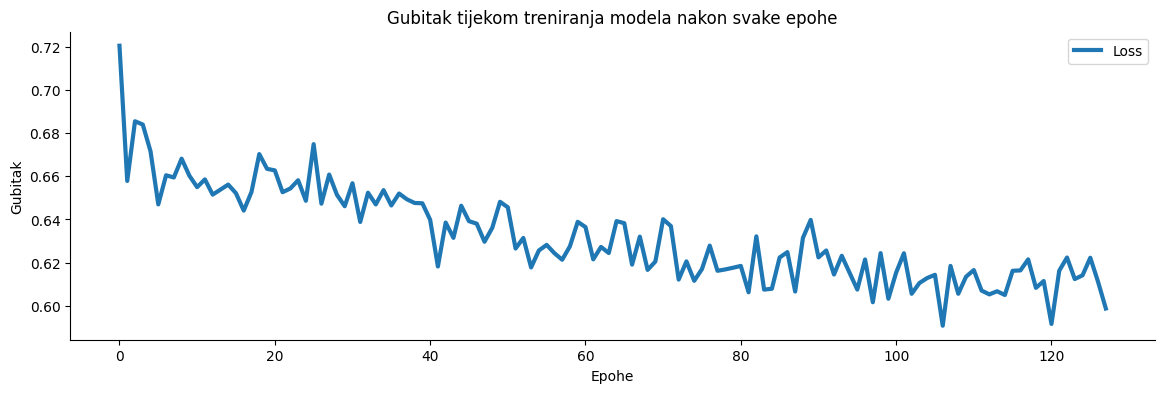

In [91]:
history1 = pd.DataFrame({'Loss': history1})

# Iscrtavanje grafa gubitaka
plt.figure(figsize=(14,4))
sns.lineplot(data=history1, lw=3)
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.title('Gubitak tijekom treniranja modela nakon svake epohe')
sns.despine()
plt.show()

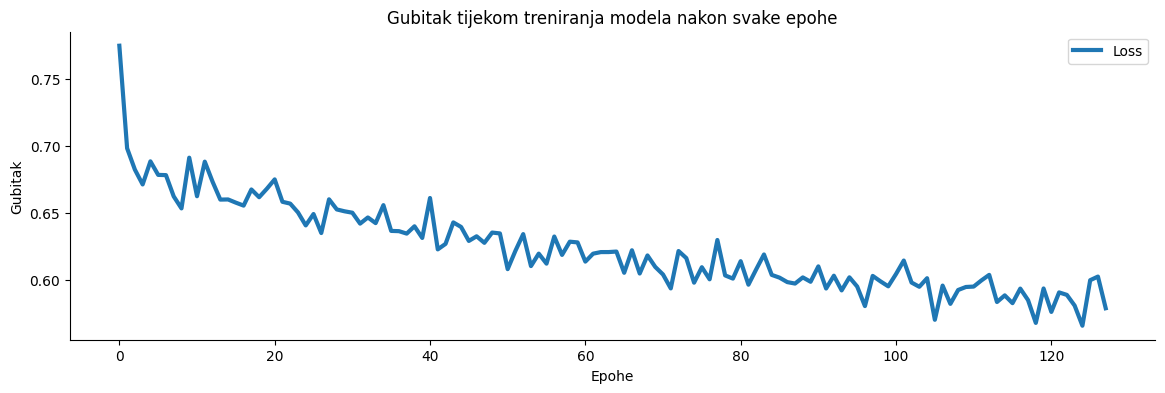

In [92]:
history2 = pd.DataFrame({'Loss': history2})

# Iscrtavanje grafa gubitaka
plt.figure(figsize=(14,4))
sns.lineplot(data=history2, lw=3)
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.title('Gubitak tijekom treniranja modela nakon svake epohe')
sns.despine()
plt.show()

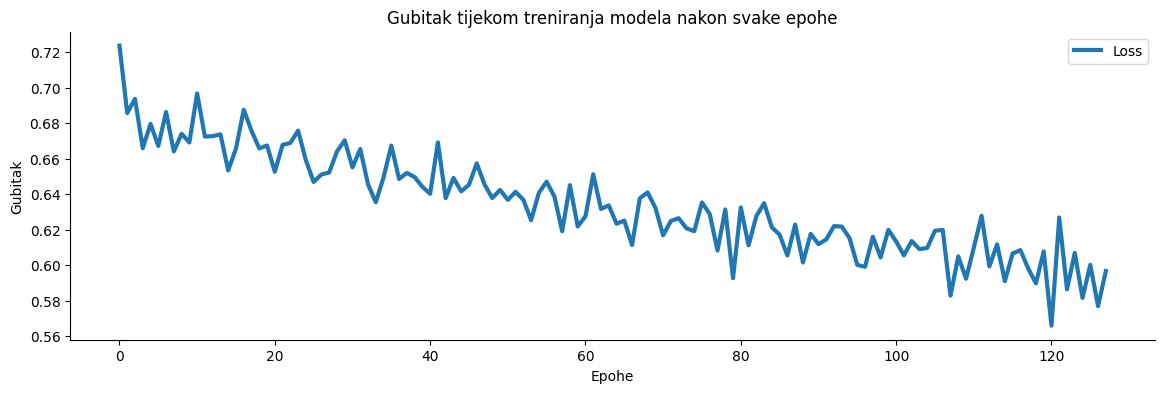

In [93]:
history3 = pd.DataFrame({'Loss': history3})

# Iscrtavanje grafa gubitaka
plt.figure(figsize=(14,4))
sns.lineplot(data=history3, lw=3)
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.title('Gubitak tijekom treniranja modela nakon svake epohe')
sns.despine()
plt.show()

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_test_tensor = torch.from_numpy(X_test.astype(np.float32)).to(device)

def evaluate_model(model, X_test_tensor, y_test_np, model_name="Model"):
    model.eval()
    with torch.no_grad():
        logits = model(X_test_tensor)
        predictions = torch.argmax(logits, dim=1).cpu().numpy()

    accuracy = accuracy_score(y_test_np, predictions)
    precision = precision_score(y_test_np, predictions)
    recall = recall_score(y_test_np, predictions)
    f1 = f1_score(y_test_np, predictions)
    conf_matrix = confusion_matrix(y_test_np, predictions)

    print(f"\n🔹 Evaluacija {model_name}")
    print(f'📌 Accuracy: {accuracy:.4f}')
    print(f'📌 Precision: {precision:.4f}')
    print(f'📌 Recall: {recall:.4f}')
    print(f'📌 F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)


y_test_np = y_test.to_numpy()

evaluate_model(model1, X_test_tensor, y_test_np, model_name="Model 1 (Plitki)")
evaluate_model(model2, X_test_tensor, y_test_np, model_name="Model 2 (Srednji)")
evaluate_model(model3, X_test_tensor, y_test_np, model_name="Model 3 (Duboki)")



🔹 Evaluacija Model 1 (Plitki)
📌 Accuracy: 0.6600
📌 Precision: 0.7626
📌 Recall: 0.7518
📌 F1 Score: 0.7571
Confusion Matrix:
[[ 26  33]
 [ 35 106]]

🔹 Evaluacija Model 2 (Srednji)
📌 Accuracy: 0.6700
📌 Precision: 0.7622
📌 Recall: 0.7730
📌 F1 Score: 0.7676
Confusion Matrix:
[[ 25  34]
 [ 32 109]]

🔹 Evaluacija Model 3 (Duboki)
📌 Accuracy: 0.6550
📌 Precision: 0.7687
📌 Recall: 0.7305
📌 F1 Score: 0.7491
Confusion Matrix:
[[ 28  31]
 [ 38 103]]


Model 2 se cini najbolji prema accuracy-u, makar su razlike dosta male. Drugi najbolji bi bio model 1, a najgori model 3. Matrica konfuzije nam ukazuje na to koliko je vrijednosti predvidjeno pozitivno, koliko negativno, i od toga koliko je predvidjeno tocno, a koliko je krivo. Dakle, iz toga slijede 4 celije.  